In [3]:
from idlelib.macosx import hideTkConsole

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import clf
import seaborn as sns

%matplotlib inline
plt.style.use('ggplot')

## Data Check

We are going to glimpse the data. We want to look at the data's features.

In [14]:
df = pd.read_csv('data/creditcard.csv')
df_copy = df.copy()
print(df.shape,
      df.head(),
      df.info(),
      df['Amount'].describe(),
      df['Class'].value_counts())

<class 'pandas.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     284807 non-nu

### Check for Missing Values

There are no missing values, so we will not have to deal with null values.

In [5]:
print(df.isnull().sum())

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64


## Exploratory Data Analysis

We will look at:
- Countplot
    - We notice that the dataset is HIGHLY imbalanced, with a very small percentage of the transactions being fraudulent
- Time of Transaction (entire dataset, non-fraudulent, fraudulent)

### Countplot

array([[<Axes: title={'center': 'Time'}>, <Axes: title={'center': 'V1'}>,
        <Axes: title={'center': 'V2'}>, <Axes: title={'center': 'V3'}>,
        <Axes: title={'center': 'V4'}>, <Axes: title={'center': 'V5'}>],
       [<Axes: title={'center': 'V6'}>, <Axes: title={'center': 'V7'}>,
        <Axes: title={'center': 'V8'}>, <Axes: title={'center': 'V9'}>,
        <Axes: title={'center': 'V10'}>, <Axes: title={'center': 'V11'}>],
       [<Axes: title={'center': 'V12'}>, <Axes: title={'center': 'V13'}>,
        <Axes: title={'center': 'V14'}>, <Axes: title={'center': 'V15'}>,
        <Axes: title={'center': 'V16'}>, <Axes: title={'center': 'V17'}>],
       [<Axes: title={'center': 'V18'}>, <Axes: title={'center': 'V19'}>,
        <Axes: title={'center': 'V20'}>, <Axes: title={'center': 'V21'}>,
        <Axes: title={'center': 'V22'}>, <Axes: title={'center': 'V23'}>],
       [<Axes: title={'center': 'V24'}>, <Axes: title={'center': 'V25'}>,
        <Axes: title={'center': 'V26'}>, <

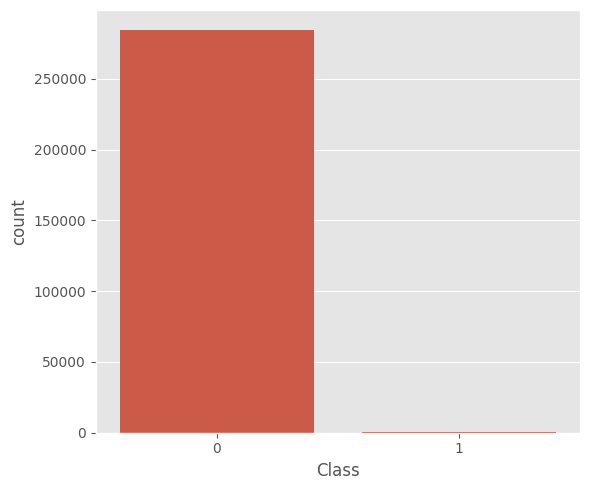

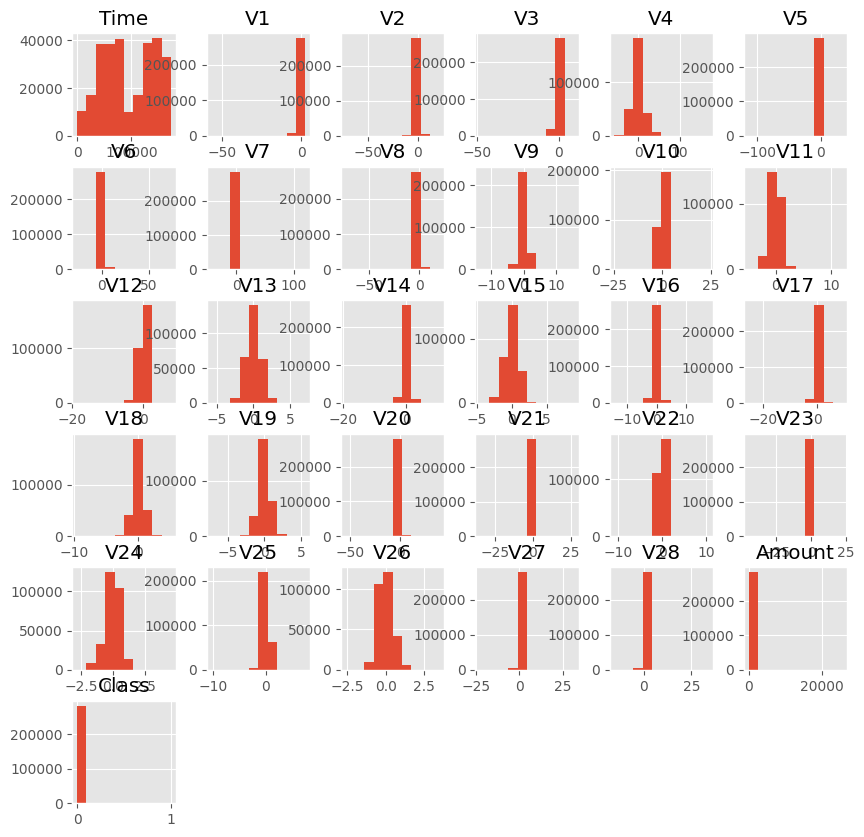

In [6]:
fig, ax = plt.subplots(figsize=(6, 5))

ax = sns.countplot(x = 'Class', data = df)
plt.tight_layout()
df.hist(figsize=(10, 10))

## Time of Transaction

Let's plot the time of transactions against the count. We are hoping to see a different trend with the fraudulent transactions. This is a good visual test.

#### Plotting all Transactions

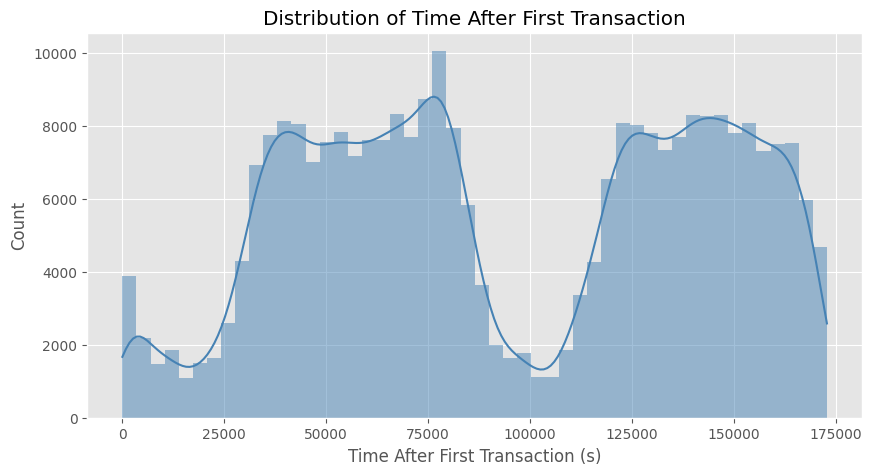

<Figure size 960x320 with 0 Axes>

In [7]:
df['Time'].describe()

# Time after first Transaction
df['Time_After_First_Transaction'] = df['Time'] - df['Time'].min()

fig, ax = plt.subplots(figsize=(10, 5))

plt.figure(figsize=(12, 4), dpi=80)
sns.histplot(
    df["Time_After_First_Transaction"],
    bins=50,
    kde=True,                 # add KDE curve
    stat="count",
    linewidth=0,
    color="steelblue",
    ax=ax
)
ax.set_title("Distribution of Time After First Transaction")
ax.set_xlabel("Time After First Transaction (s)")
ax.set_ylabel("Count")

plt.show()

#### Plotting Non-Fraudulent Transactions

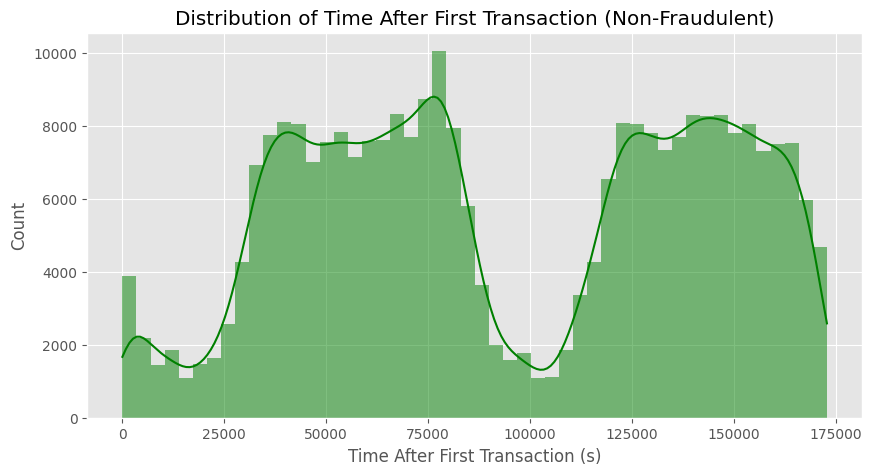

In [8]:
fig, ax = plt.subplots(figsize=(10, 5))

sns.histplot(
    data=df[df["Class"] == 0],
    x="Time_After_First_Transaction",
    bins=50,
    stat="count",
    kde=True,
    linewidth=0,
    color="green",
    #alpha=0.6,
    label="Normal (0)",
    ax=ax
)
ax.set_title("Distribution of Time After First Transaction (Non-Fraudulent)")
ax.set_xlabel("Time After First Transaction (s)")
ax.set_ylabel("Count")

plt.show()

#### Plotting Fraudulent Transactions


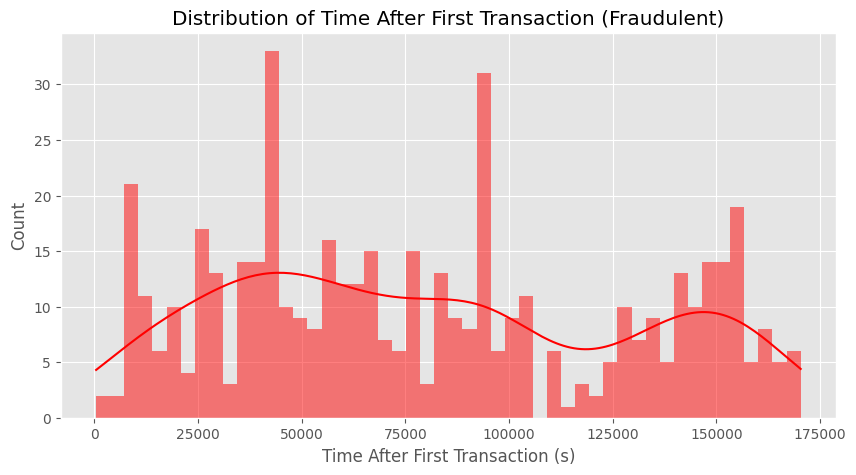

In [9]:
fig, ax = plt.subplots(figsize=(10, 5))

# Fraud (Class = 1)
sns.histplot(
    data=df[df["Class"] == 1],
    x="Time_After_First_Transaction",
    bins=50,
    stat="count",
    kde=True,
    linewidth=0,
    color="red",
    #alpha=0.6,
    label="Fraud (1)",
    ax=ax
)
ax.set_title("Distribution of Time After First Transaction (Fraudulent)")
ax.set_xlabel("Time After First Transaction (s)")
ax.set_ylabel("Count")

plt.show()

#### Plotting Both Non-Fraudulent and Fraudulent Transactions on the Same Plot

We will plot the fraudulent transactions on the same plot at the non-fraudulent transactions. We see that some of the fraudulent transactions are happening during the regular downtime of the non-fraudulent transactions.

\* We took the log of the count for the non-fraudulent transactions so that the values may be comparable.

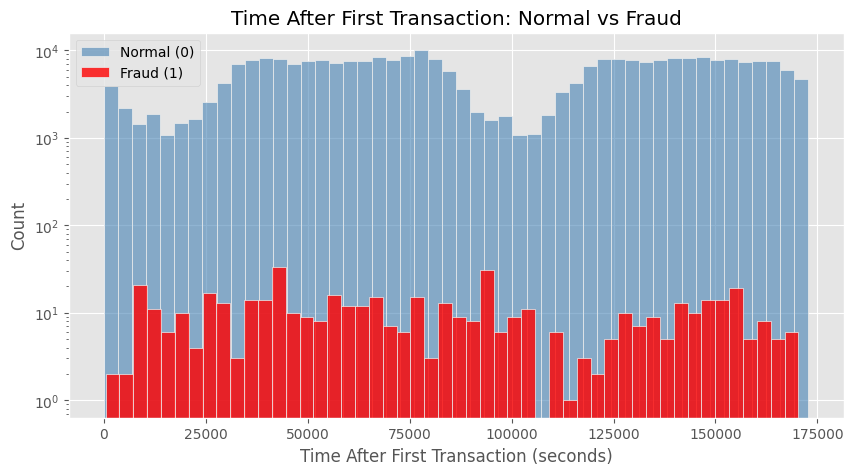

In [10]:
fig, ax = plt.subplots(figsize=(10, 5))

#1) Non‑fraud (Class = 0) as the background
sns.histplot(
    data=df[df["Class"] == 0],
    x="Time_After_First_Transaction",
    bins=50,
    stat="count",
    color="steelblue",
    alpha=0.6,
    label="Normal (0)",
    ax=ax
)

# 2) Fraud (Class = 1) layered on top
sns.histplot(
    data=df[df["Class"] == 1],
    x="Time_After_First_Transaction",
    bins=50,
    stat="count",
    color="red",
    alpha=0.8,
    label="Fraud (1)",
    ax=ax
)

ax.set_yscale('log')
#ax.set_ylim(0, 200)
ax.set_title("Time After First Transaction: Normal vs Fraud")
ax.set_xlabel("Time After First Transaction (seconds)")
ax.set_ylabel("Count")
ax.legend()

plt.show()

### Box Plots

<Axes: xlabel='Amount'>

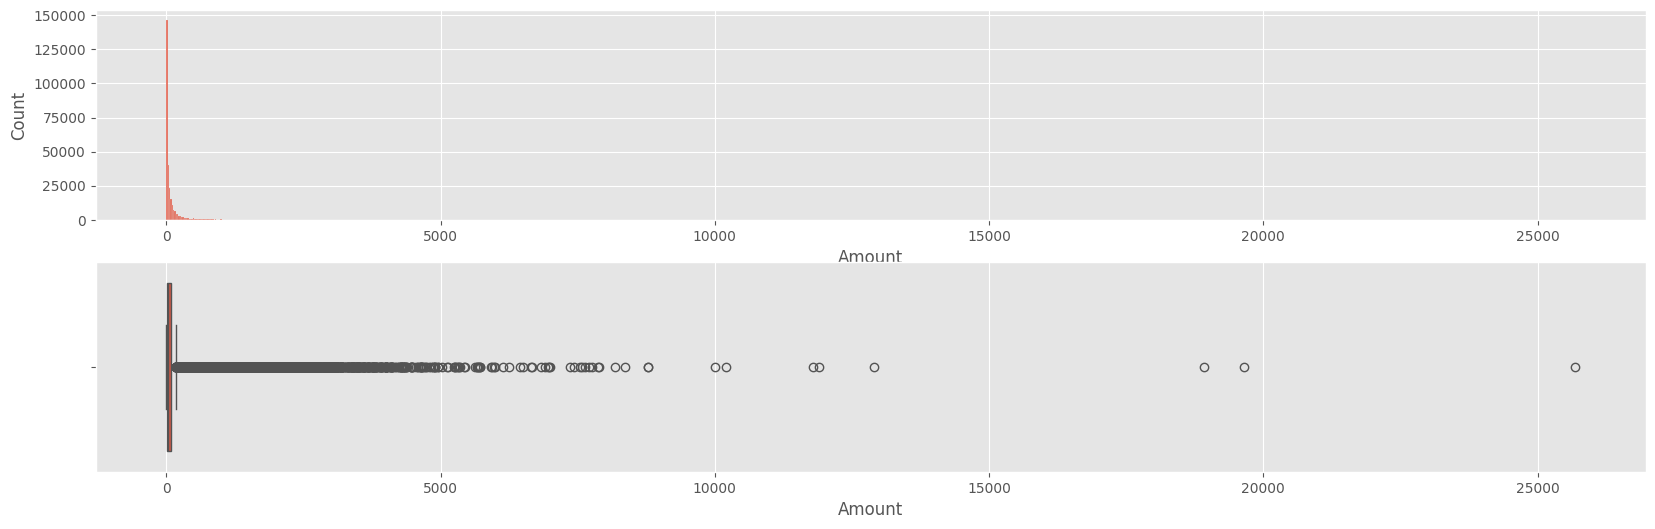

In [11]:
fig, (ax1, ax2) = plt.subplots(2,1, figsize=(20, 6))
sns.histplot(df_copy.Amount, ax=ax1)
sns.boxplot(df_copy.Amount, ax=ax2, orient = "h")

We have some outliers. Removing these outliers may remove some fraudulent transactions. Due to the low count of fraudulent transactions, we should not remove the already rare fraudulent transactions.